In [1]:
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
sequence_len = 250

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=sequence_len)
x_test = pad_sequences(x_test, maxlen=sequence_len)

print(f"Training Samples: {x_train.shape}, Testing Samples: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Samples: (25000, 250), Testing Samples: (25000, 250)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=sequence_len),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

history_rnn = model_rnn.fit(
    x_train, y_train,
    epochs=8,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5246 - loss: 0.6910 - val_accuracy: 0.5614 - val_loss: 0.6931
Epoch 2/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7636 - loss: 0.5088 - val_accuracy: 0.8372 - val_loss: 0.3797
Epoch 3/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8760 - loss: 0.3191 - val_accuracy: 0.8444 - val_loss: 0.3784
Epoch 4/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9144 - loss: 0.2308 - val_accuracy: 0.8354 - val_loss: 0.4948
Epoch 5/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9228 - loss: 0.2118 - val_accuracy: 0.8576 - val_loss: 0.3598
Epoch 6/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9653 - loss: 0.1049 - val_accuracy: 0.8444 - val_loss: 0.4054
Epoch 7/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9860 - loss: 0.0546 - val_accuracy: 0.8526 - val_loss: 0.4640
Epoch 8/8
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9949 - loss: 0.0226 - val_accuracy: 0.8572 - val_loss

In [3]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=sequence_len),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6023 - loss: 0.6690 - val_accuracy: 0.8082 - val_loss: 0.4319
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8422 - loss: 0.3802 - val_accuracy: 0.8664 - val_loss: 0.3184
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9101 - loss: 0.2344 - val_accuracy: 0.8750 - val_loss: 0.3112
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9296 - loss: 0.1919 - val_accuracy: 0.8814 - val_loss: 0.3275
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9546 - loss: 0.1331 - val_accuracy: 0.8786 - val_loss: 0.3604
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9650 - loss: 0.1104 - val_accuracy: 0.8710 - val_loss: 0.3711
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9677 - loss: 0.0994 - val_accuracy: 0.8680 - val_loss: 0.4955
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9457 - loss: 0.1445 - val_accuracy: 0.8754 - v

In [4]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=sequence_len),
    GRU(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru.summary()

history_gru = model_gru.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5493 - loss: 0.6876 - val_accuracy: 0.7314 - val_loss: 0.5538
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7965 - loss: 0.4431 - val_accuracy: 0.8464 - val_loss: 0.3747
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8959 - loss: 0.2623 - val_accuracy: 0.8616 - val_loss: 0.3411
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9261 - loss: 0.1941 - val_accuracy: 0.8760 - val_loss: 0.3263
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9426 - loss: 0.1535 - val_accuracy: 0.8732 - val_loss: 0.3781
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9582 - loss: 0.1218 - val_accuracy: 0.8584 - val_loss: 0.3702
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9668 - loss: 0.1021 - val_accuracy: 0.8594 - val_loss: 0.4170
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9785 - loss: 0.0775 - val_accuracy: 0.8422 - v

In [5]:
loss_rnn, acc_rnn = model_rnn.evaluate(x_test, y_test, verbose=0)
loss_lstm, acc_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
loss_gru, acc_gru = model_gru.evaluate(x_test, y_test, verbose=0)

print(f"RNN Test Accuracy:  {acc_rnn:.4f}")
print(f"LSTM Test Accuracy: {acc_lstm:.4f}")
print(f"GRU Test Accuracy:  {acc_gru:.4f}")


RNN Test Accuracy:  0.8509
LSTM Test Accuracy: 0.8547
GRU Test Accuracy:  0.8420


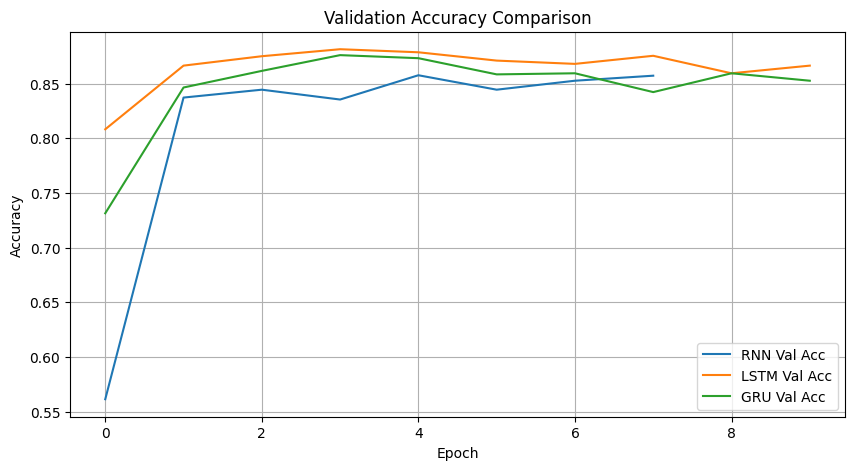

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val Acc')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Acc')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
sample_input = x_test[100].reshape(1, -1)

pred_rnn = model_rnn.predict(sample_input)[0][0]
pred_lstm = model_lstm.predict(sample_input)[0][0]
pred_gru = model_gru.predict(sample_input)[0][0]

print(f"RNN Prediction:  {pred_rnn:.4f}")
print(f"LSTM Prediction: {pred_lstm:.4f}")
print(f"GRU Prediction:  {pred_gru:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
RNN Prediction:  0.0056
LSTM Prediction: 0.1969
GRU Prediction:  0.8025


So, in this IMDB sentiment analysis task, we tested three models—RNN, LSTM, and GRU—and all of them gave pretty decent results. LSTM came out on top with a test accuracy of 85.47%, just a bit ahead of the RNN which got 85.09%. The GRU was slightly behind with 84.20%, but still not bad.

When I tried predicting the sentiment of a test review, both the RNN and LSTM leaned more toward negative sentiment (low scores), while the GRU gave a much higher score, suggesting it saw the review as more positive. It’s interesting how each model interprets things a little differently based on how they handle sequence data.

Overall, LSTM seemed to strike the best balance between understanding context and giving accurate predictions. But honestly, even the RNN did a solid job—so if you're short on resources or need faster training, it’s still a good option.